<a href="https://colab.research.google.com/github/Hani1-2/DeepLearningAssignmnt/blob/master/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
import keras

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [ ]:
cars = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.shape

(205, 26)

# Checking Missing Values

In [ ]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Since some values are in string so we convert theminto numpy array

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cars['aspiration'] = labelencoder.fit_transform(cars['aspiration'])
cars['carbody'] = labelencoder.fit_transform(cars['carbody'])
#cars['cylindernumber'] = labelencoder.fit_transform(cars['cylindernumber'])
cars['enginetype'] = labelencoder.fit_transform(cars['enginetype'])
cars['enginelocation'] = labelencoder.fit_transform(cars['enginelocation'])
cars['drivewheel'] = labelencoder.fit_transform(cars['drivewheel'])
#cars['CarName'] = labelencoder.fit_transform(cars['CarName'])
#cars['fueltype'] = labelencoder.fit_transform(cars['fueltype'])
cars['fuelsystem'] = labelencoder.fit_transform(cars['fuelsystem'])
cars['doornumber'] = labelencoder.fit_transform(cars['doornumber'])

 **Step : 2**
 
# **Data Cleaning** 

In [ ]:
cars.isna().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,0,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,5,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,3,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,3,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


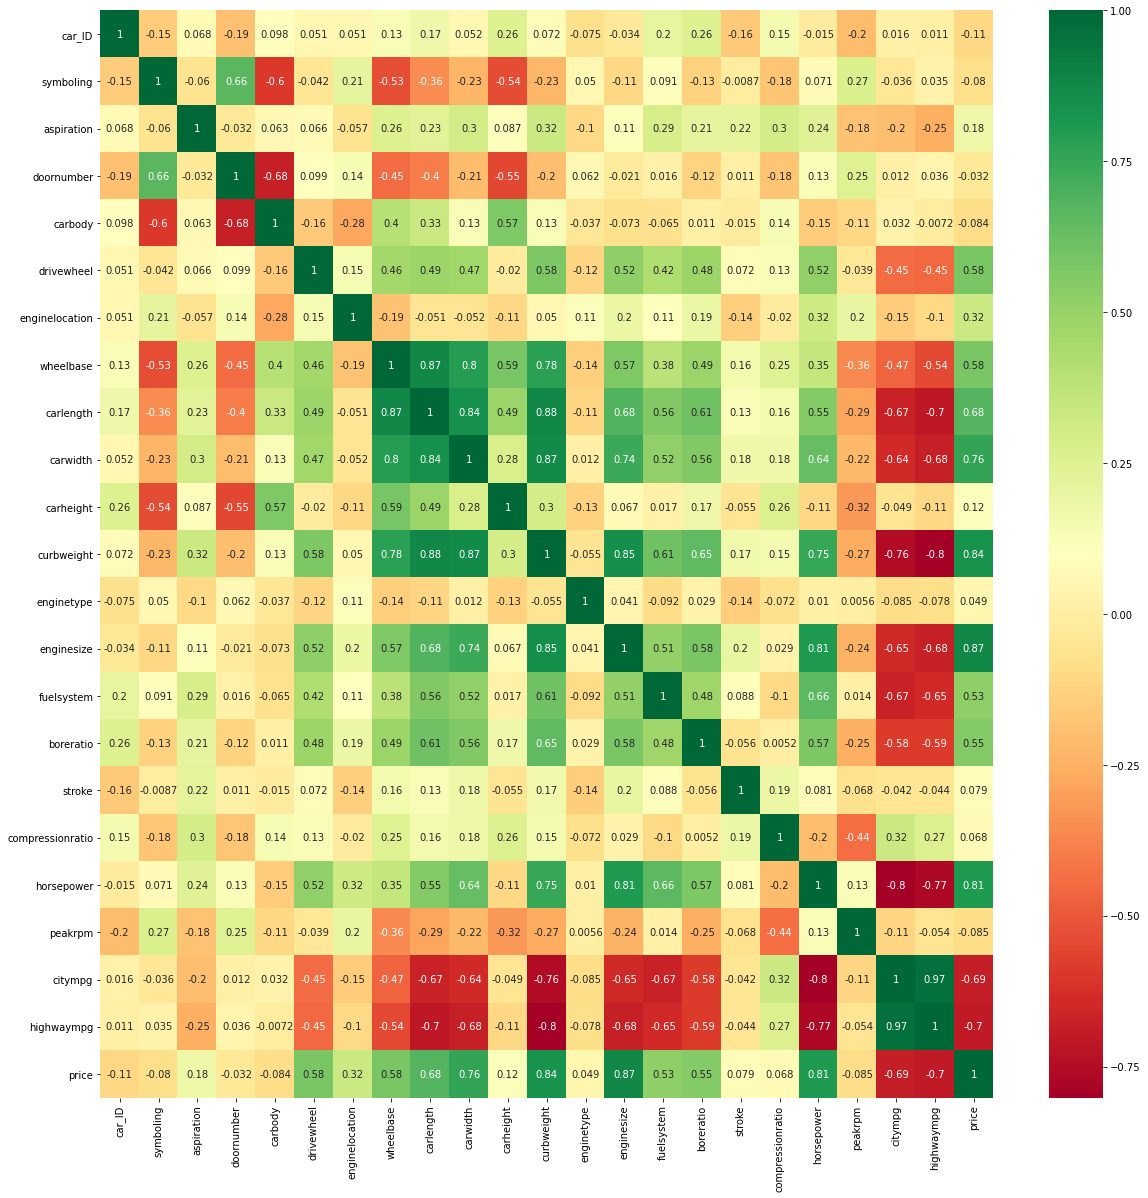

In [ ]:
corrmat = cars.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(cars[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [ ]:
cars1 = cars.drop(columns=['aspiration','cylindernumber','enginetype','carbody','CarName','fueltype','fuelsystem','doornumber'])

In [ ]:
cars1.shape

(205, 18)

In [ ]:
cars1.head()

,car_ID,symboling,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
#Checking for duplicates
cars1.loc[cars1.duplicated()]

,car_ID,symboling,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Prediction Of Prices

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


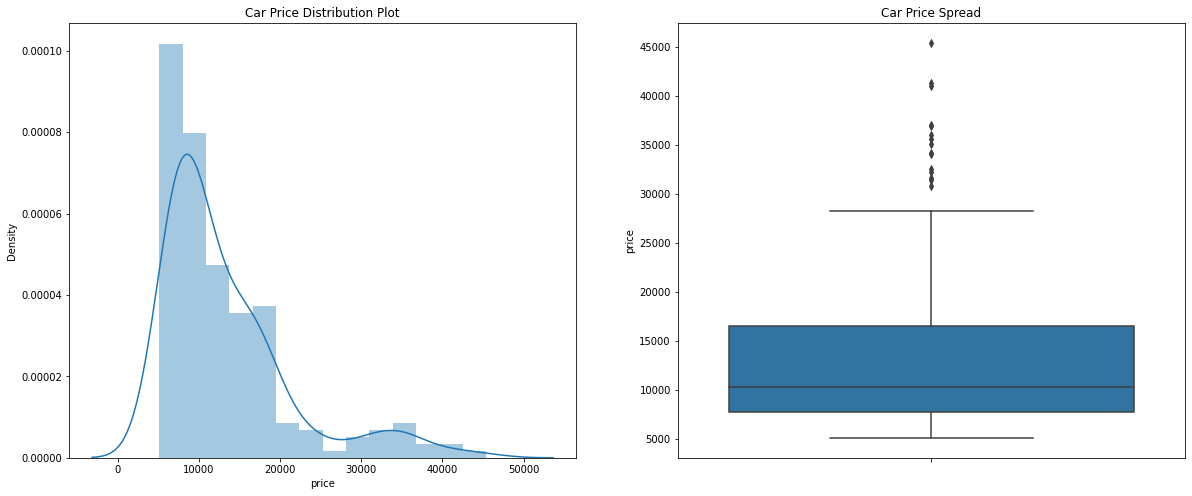

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [ ]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


The data points spread out of mean, which indicates a high variance in te car(85% of the prices are below 18,500 and the remaining are between 18,000 and 45,400).

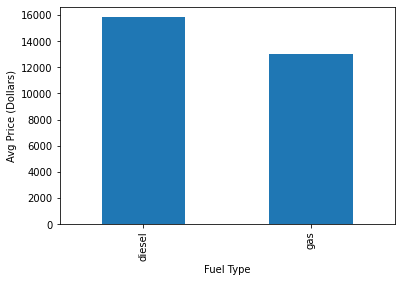

In [ ]:
cars_fuel_avg_price = cars[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = cars_fuel_avg_price.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()



seems diesel is more used than gas

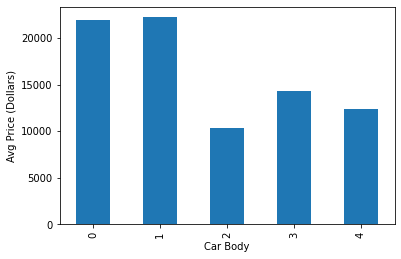

In [ ]:
cars_body_avg_price = cars[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = cars_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

So convertible and hardtop are more expensive than others.

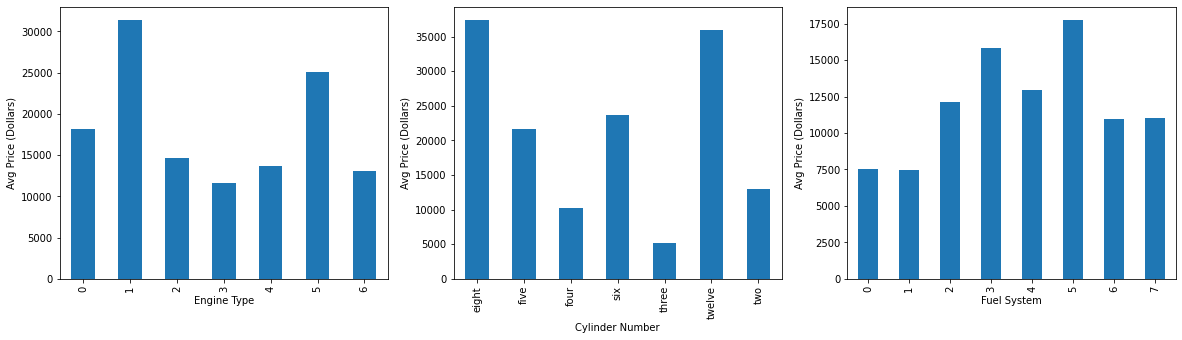

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
#
cars_engine_avg_price = cars[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = cars_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")

#
cars_cylindernumber_avg_price = cars[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = cars_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")

#
cars_fuelsystem_avg_price = cars[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = cars_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")

plt.show()

 DOHCV and OHCV engine types are priced high.

Eight and twelve cylinder cars have higher price.

IDI and MPFI fuel system have higher price.

## Split data into train and test

In [ ]:
x = (cars1.loc[:, cars1.columns != 'price'])
y = (cars1.loc[:, cars1.columns == 'price'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

# Inspect the DATA

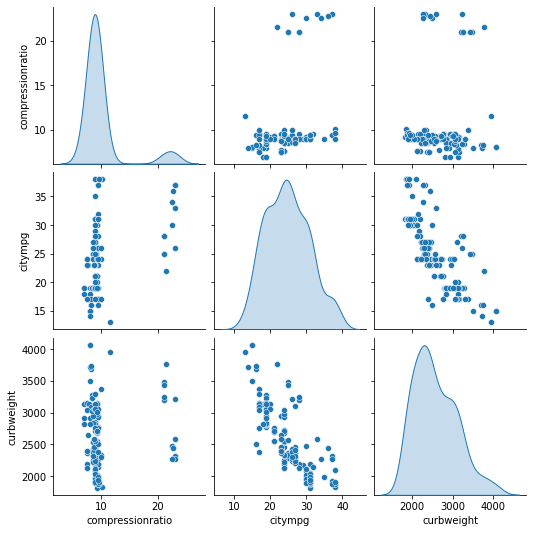

In [ ]:
sns.pairplot(x_train[['compressionratio','citympg','curbweight']], diag_kind="kde")

In [ ]:
x_train.shape

(143, 17)

In [ ]:
x_test.shape

(62, 17)

In [ ]:
train_stats=x_train.describe()
train_stats

,car_ID,symboling,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,102.685315,0.846154,1.349650,0.013986,98.930070,174.655245,65.988811,53.791608,2573.237762,127.013986,3.320559,3.257552,9.983986,105.699301,5154.545455,24.818182,30.321678
std,60.982729,1.235095,0.547192,0.117845,6.073737,12.407288,2.181939,2.480075,522.368306,41.436526,0.272339,0.307434,3.745026,40.343950,487.191907,5.915647,6.232131
min,1.000000,-2.000000,0.000000,0.000000,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000
25%,48.500000,0.000000,1.000000,0.000000,94.500000,166.800000,64.200000,52.000000,2190.500000,98.000000,3.150000,3.115000,8.550000,74.500000,4800.000000,19.000000,25.000000
50%,107.000000,1.000000,1.000000,0.000000,97.200000,173.400000,65.500000,54.100000,2443.000000,120.000000,3.310000,3.270000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,156.500000,2.000000,2.000000,0.000000,102.200000,184.600000,66.900000,55.700000,2953.000000,141.000000,3.540000,3.405000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,205.000000,3.000000,2.000000,1.000000,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,38.000000,47.000000


# Split features from labels

In [ ]:
train_labels = train_dataset.pop('highwaympg')
test_labels = test_dataset.pop('highwaympg')

# Normalize the data

In [ ]:
x_train

,car_ID,symboling,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
177,178,-1,1,0,102.4,175.6,66.5,53.9,2458,122,3.31,3.54,8.7,92,4200,27,32
75,76,1,2,0,102.7,178.4,68.0,54.8,2910,140,3.78,3.12,8.0,175,5000,19,24
174,175,-1,1,0,102.4,175.6,66.5,54.9,2480,110,3.27,3.35,22.5,73,4500,30,33
31,32,2,1,0,86.6,144.6,63.9,50.8,1819,92,2.91,3.41,9.2,76,6000,31,38
12,13,0,2,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,9.0,121,4250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,1,2,0,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,160,5200,19,25
14,15,1,2,0,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,4250,20,25
92,93,1,1,0,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,9.4,69,5200,31,37
179,180,3,2,0,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,161,5200,19,24


In [ ]:
def norm(x):
  return (x - train_stats.loc['mean'])/train_stats.loc['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

# Building Network

In [ ]:
from keras import models
from keras import layers
def build_model():
    model = Sequential()
    model.add(Dense(10, activation='relu',input_shape=(x_train.shape[1],)))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(6))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# K4 Validation

In [ ]:
model = build_model()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


# Train Model

In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 212870640.0000 - mae: 12823.3921
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 235558562.6667 - mae: 13025.2913
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 240990674.6667 - mae: 13093.4380
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 233032696.0000 - mae: 13076.8299
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 219979733.3333 - mae: 12568.2020
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 218796530.6667 - mae: 12713.7371
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 226627789.3333 - mae: 12630.8778
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 239072176.0000 - mae: 13123.0326
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 212955837.3333 - mae: 12362.0103
Epoch 10/100
5/5 [==============================] - 0s 2ms/step 

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([[15561.262 , 15381.612 , 15395.772 , 15317.494 , 15387.602 ,
        15381.887 ],
       [15230.622 , 15057.365 , 15079.707 , 14984.199 , 15052.646 ,
        15047.631 ],
       [13348.36  , 13143.951 , 13243.153 , 13127.237 , 13190.283 ,
        13184.088 ],
       [14130.653 , 13954.311 , 13994.726 , 13895.18  , 13976.267 ,
        13964.08  ],
       [14752.321 , 14731.088 , 14515.433 , 14509.373 , 14627.807 ,
        14602.464 ],
       [12763.233 , 12546.625 , 12679.298 , 12548.566 , 12604.561 ,
        12600.402 ],
       [12152.102 , 12015.529 , 12028.479 , 11943.4375, 12027.117 ,
        12011.1045],
       [12369.3   , 12191.827 , 12263.7705, 12159.232 , 12233.    ,
        12221.01  ],
       [13626.611 , 13441.181 , 13504.96  , 13397.52  , 13475.595 ,
        13463.791 ],
       [12608.964 , 12454.029 , 12489.636 , 12390.428 , 12476.557 ,
        12460.176 ],
       [14573.272 , 14369.416 , 14438.513 , 14330.883 , 14418.339 ,
        14403.742 ],
       [12490.149 , 1